<a href="https://colab.research.google.com/github/fahim-01/Basic-Pytorch-with-Deep-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

epoch:10, loss= 4340.7974
epoch:20, loss= 3237.5603
epoch:30, loss= 2439.9690
epoch:40, loss= 1862.6963
epoch:50, loss= 1444.4465
epoch:60, loss= 1141.1202
epoch:70, loss= 920.9426
epoch:80, loss= 760.9891
epoch:90, loss= 644.6985
epoch:100, loss= 560.0927


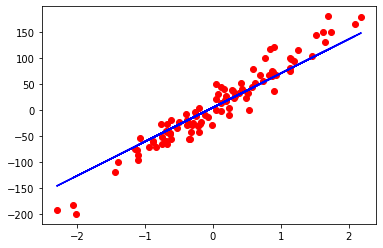

In [3]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#Prepare data

x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
x= torch.from_numpy(x_numpy.astype(np.float32))
y= torch.from_numpy(y_numpy.astype(np.float32))
y= y.view(y.shape[0],1)

n_samples, n_features = x.shape

#model

input_size = n_features
output_size= 1

model = nn.Linear(input_size, output_size)


#loss and optimizer

learning_rate=0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
num_epochs =100
for epoch in range(num_epochs):
  #forward pass and loss
  y_hat = model(x)
  loss = criterion(y_hat, y)


  #backward
  loss.backward()


  #update
  optimizer.step()
  optimizer.zero_grad()

  if(epoch+1)%10 ==0:
    print(f'epoch:{epoch+1}, loss= {loss.item():.4f}')



#plot
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')

plt.plot(x_numpy, predicted, 'b')

plt.show()
